# **IMPORT STATEMENTS**

In [789]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **LOAD THE DATASET**

In [790]:
df=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# **DROP Unnecessary Columns**

In [791]:
df.drop(["url","address","phone","menu_item","listed_in(city)","reviews_list"],axis=1,inplace=True)

# **Check for Duplicates**

In [792]:
df.duplicated().sum()

16608

In [793]:
df.drop_duplicates(inplace=True)

# **CHECK NULL VALUES**

In [794]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            3770
votes                              0
location                          14
rest_type                        156
dish_liked                     17007
cuisines                          33
approx_cost(for two people)      221
listed_in(type)                    0
dtype: int64

In [795]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


# **Data Cleaning**

# **1) Rate**

In [796]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [797]:
def clean(text):
    text=str(text)
    text=re.sub(r"/+","",text) # Remove/5
    text=re.sub("[^0.0-9.0]","",text) #Remove non numeric character such as [NEW,-]
    return text

In [798]:
df["rate"]=df["rate"].apply(clean)
df["rate"]=pd.to_numeric(df["rate"])
df["rate"].unique()

array([4.15, 3.85, 3.75, 3.65, 4.65, 4.05, 4.25, 3.95, 3.15, 3.05, 3.25,
       3.35, 2.85, 4.45, 4.35,  nan, 2.95, 3.55, 2.65, 3.45, 4.55, 2.55,
       2.75, 4.75, 2.45, 2.25, 2.35, 4.85, 4.95, 2.15, 2.05, 1.85])

In [799]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.15,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


# **2) Name**

In [800]:
def clean(text):
    text=str(text)
    text=re.sub("[^a-zA-Z0-9]","",text) #Remove non alphanumeric character
    return text

In [801]:
df["name"]=df["name"].apply(clean)

In [802]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.15,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


# **Convert Yes/No to 0/1**

In [803]:
def convertToBoolean(text):
    text=str(text)
    if text=="Yes":
        return 1
    else:
        return 0

df["online_order"]= df["online_order"].apply(convertToBoolean)
df["book_table"]=df["book_table"].apply(convertToBoolean)

In [804]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.15,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet


# **Approx_cost(for two people)**

In [805]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(",","") #Replace the comma
df["approx_cost(for two people)"]=pd.to_numeric(df["approx_cost(for two people)"])      #Convert to Numeric
df.rename(columns={"approx_cost(for two people)":"Cost2People"},inplace=True)           #Rename the column

In [806]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost2People,listed_in(type)
0,Jalsa,1,1,4.15,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet


In [807]:
def total(text):
    text=str(text)
    list=text.split(",")
    return len(list)

In [808]:
df["Total cuisines"]=df["cuisines"].apply(total)
df.drop("cuisines",axis=1,inplace=True)

In [809]:
df["Total dish liked"]=df["dish_liked"].apply(total)
df.drop("dish_liked",axis=1,inplace=True)

In [810]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,Cost2People,listed_in(type),Total cuisines,Total dish liked
0,Jalsa,1,1,4.15,775,Banashankari,Casual Dining,800.0,Buffet,3,7


In [811]:
len(df["location"].unique())

94

# **Deal with Null value**

In [812]:
# Fill null values with mean for numerical columns
mean = df["rate"].mean()
df["rate"] = df["rate"].fillna(mean)

# Fill null values with mean for numerical columns
df['Cost2People']=df['Cost2People'].fillna(df['Cost2People'].mean())

# Fill null values with mode for categorical columns
df['rest_type']=df['rest_type'].fillna(df['rest_type'].mode()[0])

# Fill null values with mode for categorical columns
df['location']=df['location'].fillna(df['location'].mode()[0])

In [813]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
Cost2People         0
listed_in(type)     0
Total cuisines      0
Total dish liked    0
dtype: int64

# **Dealing with Categorical Variable [Location]**

# **Location**

In [814]:
# Calculate the frequency of each location
frequency_encoding = df['location'].value_counts()

# Map the frequencies to the original DataFrame
df['location_encoded'] = df['location'].map(frequency_encoding)

In [815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              35109 non-null  object 
 1   online_order      35109 non-null  int64  
 2   book_table        35109 non-null  int64  
 3   rate              35109 non-null  float64
 4   votes             35109 non-null  int64  
 5   location          35109 non-null  object 
 6   rest_type         35109 non-null  object 
 7   Cost2People       35109 non-null  float64
 8   listed_in(type)   35109 non-null  object 
 9   Total cuisines    35109 non-null  int64  
 10  Total dish liked  35109 non-null  int64  
 11  location_encoded  35109 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.5+ MB


In [816]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,Cost2People,listed_in(type),Total cuisines,Total dish liked,location_encoded
0,Jalsa,1,1,4.15,775,Banashankari,Casual Dining,800.0,Buffet,3,7,574


In [817]:
df.drop("name",axis=1,inplace=True)

In [818]:
df.head(1)

,online_order,book_table,rate,votes,location,rest_type,Cost2People,listed_in(type),Total cuisines,Total dish liked,location_encoded
0,1,1,4.15,775,Banashankari,Casual Dining,800.0,Buffet,3,7,574


In [819]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [820]:
# Calculate the frequency 
frequency_encoding = df['listed_in(type)'].value_counts()

# Map the frequencies to the original DataFrame
df['listed_in(type)'] = df['listed_in(type)'].map(frequency_encoding)

# **CORELATION MATRIX**

<Axes: >

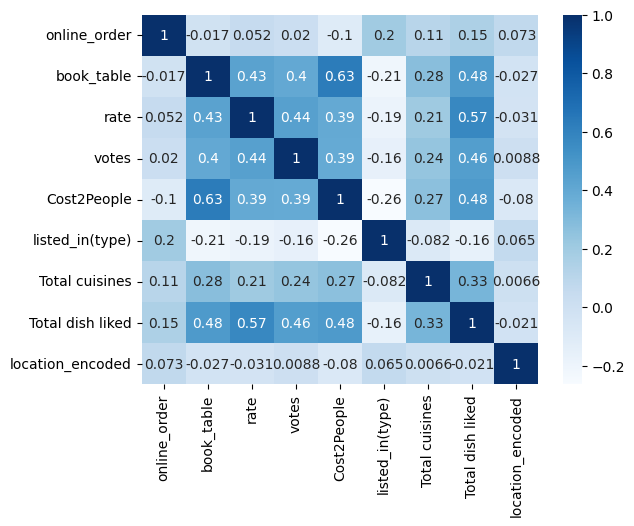

In [821]:
cr=df.corr(numeric_only=True)
sns.heatmap(cr,annot=True,cmap="Blues")

In [822]:
df.isna().sum()

online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
Cost2People         0
listed_in(type)     0
Total cuisines      0
Total dish liked    0
location_encoded    0
dtype: int64

# **Features**

In [823]:
df.head(1)

,online_order,book_table,rate,votes,location,rest_type,Cost2People,listed_in(type),Total cuisines,Total dish liked,location_encoded
0,1,1,4.15,775,Banashankari,Casual Dining,800.0,676,3,7,574


In [824]:
X = df[["online_order", "book_table", "votes","Cost2People", "listed_in(type)", "Total cuisines", "Total dish liked", "location_encoded"]]

In [825]:
Y=df["rate"]

# **Splitting**

In [826]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [827]:
X_train.shape

(28087, 8)

In [828]:
X_test.shape

(7022, 8)

# **Linear Regression**

In [829]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_train)

In [830]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train, y_pred)
print("R² Score:", r2)

R² Score: 0.3883431556785798


# **Random Forest Regression**

In [831]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)
y_pred=model.predict(X_train)

In [832]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train, y_pred)
print("R² Score:", r2)

R² Score: 0.9727369459668078
